# 6.13.3 El problema de Kirsch

In [1]:
from sympy import init_printing, latex, symbols, diff, Function, expand, limit, oo, sin, cos, factor , simplify, dsolve, Eq, solve, lambdify, pi

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

Se definen las variables a utilizar:

In [2]:
r, re, a    = symbols('r, r_e, a')     # geometría
Sx, Sy, Txy = symbols('S_x S_y T_xy')  # esfuerzos

Considere el estado de esfuerzos mostrado en la figura:

<img src="Kirsch1.png" width="800">

la cual tiene en su interior un hueco circular de radio $r_i=a$

In [3]:
ri = a       # radio interior                        

y está sometida al estado de esfuerzos uniformes mostrado. En este caso, los esfuerzos aplicados son: $\sigma_x = S_x$, $\sigma_y=0$ y $\tau_{xy} = 0$.

Al reemplazar estos valores del esfuerzo en las ecuaciones:
\begin{align}
\sigma_r        &= \sigma_x\cos^2\theta + \sigma_y\sin^2\theta + \tau_{xy}\sin 2\theta            = \frac{\sigma_x+\sigma_y}{2} + \frac{\sigma_x-\sigma_y}{2}\cos 2\theta + \tau_{xy}\sin 2\theta  \label{eq:sr_sxsytxyb}\\
\sigma_\theta   &= \sigma_x\sin^2\theta + \sigma_y\cos^2\theta - \tau_{xy}\sin 2\theta            = \frac{\sigma_x+\sigma_y}{2} - \frac{\sigma_x-\sigma_y}{2}\cos 2\theta - \tau_{xy}\sin 2\theta   \label{eq:st_sxsytxyb}\\
%\sigma_z        &= \sigma_z \\
\tau_{r\theta}  &= \frac{1}{2}\left(\sigma_y - \sigma_x\right)\sin 2\theta + \tau_{xy}\cos 2\theta \label{eq:trt_sxsytxy} \\
%\tau_{rz}       &= \tau_{yz}\sin\theta + \tau_{xz}\cos\theta\\
%\tau_{\theta z} &= \tau_{yz}\cos\theta - \tau_{xz}\sin\theta.
\end{align}
se obtiene:
\begin{alignat}{2}
  \sigma_r(r_e,\theta)       &= \phantom{-}S_x\cos^2\theta &&= \frac{S_x}{2} + \frac{S_x\cos 2\theta}{2}\\
  \sigma_\theta(r_e,\theta)  &= \phantom{-}S_x\sin^2\theta &&= \frac{S_x}{2} - \frac{S_x\cos 2\theta}{2}\\
  \tau_{r\theta}(r_e,\theta) &= -\frac{S_x}{2}\sin 2\theta. &&
\end{alignat}

Observe que dicha condición de esfuerzos se puede escribir como la suma de las dos condiciones de esfuerzos siguientes:
\begin{align}
  \sigma_r^*(r_e,\theta)    &= \frac{S_x}{2}             & \sigma_\theta^*(r_e,\theta)    &= \frac{S_x}{2}              & \tau_{r\theta}^*(r_e,\theta) &= 0  \label{eq:est_ast1_kirsch}  \\  
  \sigma_r^{**}(r_e,\theta) &= \frac{S_x\cos 2\theta}{2} & \sigma_\theta^{**}(r_e,\theta) &= -\frac{S_x\cos 2\theta}{2} & \tau_{r\theta}^{**}(r_e,\theta) &= -\frac{S_x\sin 2\theta}{2}.\qquad\quad \label{eq:est_ast2_kirsch}
\end{align}
de modo que, por ejemplo, $\sigma_r(r_e,\theta) = \sigma_r^*(r_e,\theta) + \sigma_r^{**}(r_e,\theta)$.

## Estimación de los esfuerzos asociados a $\sigma_r^*(r_e,\theta)$, $\sigma_\theta^*(r_e,\theta)$ y $\tau_{r\theta}^*(r_e,\theta)$

Las condiciones con un asterisco no dependen ni de $r$ ni de $\theta$, por lo que se pueden usar los resultados para arandelas sujetas a un estado de esfuerzos axisimétricos:
\begin{align}
   \sigma_r(r)      &= \frac{p_i r_i^2 - p_e r_e^2}{r_e^2-r_i^2} + \frac{r_i^2 r_e^2 \left(p_e - p_i\right)}{r^2\left(r_e^2-r_i^2\right)} \label{eq:esf_anillo_no_omega_sr}\\
   \sigma_\theta(r) &= \frac{p_i r_i^2 - p_e r_e^2}{r_e^2-r_i^2} - \frac{r_i^2 r_e^2 \left(p_e - p_i\right)}{r^2\left(r_e^2-r_i^2\right)}
   \label{eq:esf_anillo_no_omega_st}\\
   \tau_{r \theta}(r) &= 0 \label{eq:esf_anillo_no_omega_trt}
\end{align}

Supongamos una arandela que está sujeta a una presión interior nula $p_i=0$ y una exterior $p_e = -S_x/2$:

In [4]:
p_i = 0      # esfuerzo aplicado en el radio interior
p_e = -Sx/2  # esfuerzo aplicado en el radio exterior (pregunta: ¿por qué se escribió -Sx/2 y no +Sx/2?)

Los esfuerzos en la arandela se reducen a:

In [5]:
sr  = (p_i*ri**2 - p_e*re**2)/(re**2 - ri**2) + (ri**2*re**2*(p_e - p_i))/(r**2*(re**2 - ri**2))
st  = (p_i*ri**2 - p_e*re**2)/(re**2 - ri**2) - (ri**2*re**2*(p_e - p_i))/(r**2*(re**2 - ri**2))
trt = 0

In [6]:
imprimir(r"\sigma_r(r) = ", simplify(sr))

<IPython.core.display.Math object>

In [7]:
imprimir(r"\sigma_\theta(r) = ", simplify(st))

<IPython.core.display.Math object>

Si asumimos que el radio exterior $r_e$ es muy grande (en otras palabras, haciéndolo tender a infinito):

In [8]:
# se toma el límite cuando el radio exterior tiende a infinito
sr_ast1  = expand(limit(sr, re, oo))
st_ast1  = expand(limit(st, re, oo))
trt_ast1 = 0

obtenemos que los esfuerzos al interior de la lámina perforada, producidos por la condición de carga mostrada están dados por:

In [9]:
imprimir(r'\sigma_r^{*}(r,\theta) = ', sr_ast1)

<IPython.core.display.Math object>

In [10]:
imprimir(r'\sigma_\theta^{*}(r,\theta) = ', st_ast1)

<IPython.core.display.Math object>

In [11]:
imprimir(r'\tau_{r\theta}^{*}(r,\theta) = ', trt_ast1)

<IPython.core.display.Math object>

Observe que el estado de esfuerzos $\sigma_\theta^{*}(r,\theta)$ evaluado para un radio $r=r_e$, que tiende a infinito, es igual a $S_x/2$, tal y como se había solicitado:
\begin{align}
  \sigma_r^*(r_e,\theta)    &= \frac{S_x}{2}             & \sigma_\theta^*(r_e,\theta)    &= \frac{S_x}{2}              & \tau_{r\theta}^*(r_e,\theta) &= 0
\end{align}

## Estimación de los esfuerzos asociados a $\sigma_r^{**}(r_e,\theta)$, $\sigma_\theta^{**}(r_e,\theta)$ y $\tau_{r\theta}^{**}(r_e,\theta)$

Kirsch observó que la función de tensión de Airy $\phi(r,\theta) = f(r)\cos 2\theta$, permite modelar las condiciones de esfuerzos asociada a $\sigma_r^{**}(r_e,\theta)$, $\sigma_\theta^{**}(r_e,\theta)$ y $\tau_{r\theta}^{**}(r_e,\theta)$.

Se define la función de tensión de Airy $\phi(r,\theta)$:

In [12]:
r, t = symbols('r, theta')
f    = Function('f')(r)
phi  = f*cos(2*t)

Se define el laplaciano en coordenadas polares:
\begin{equation}
     \nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} 
     = \frac{\partial^2 \phi}{\partial r^2} + \frac{1}{r}\frac{\partial \phi}{\partial r} + \frac{1}{r^2}\frac{\partial^2 \phi}{\partial \theta^2}
\end{equation}

In [13]:
lapl = lambda f : diff(f,r,2) + (1/r)*diff(f,r) + (1/r**2)*diff(f,t,2)

Se calcula el biarmónico de la función de tensión de Airy propuesta:

In [14]:
bphi = simplify(lapl(lapl(phi)))

imprimir(r"\nabla^4 \phi(r, \theta) = ", bphi, "= 0")

<IPython.core.display.Math object>

Ahora procedemos a resolver la ecuación diferencial:

In [15]:
# hacemos primero una simplificación
ec_dif = bphi*r**3/cos(2*t)

De modo que la ecuación diferencial a resolver es una ecuación diferencial de [Cauchy-Euler](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Euler_equation):

In [16]:
imprimir("", ec_dif, "= 0")

<IPython.core.display.Math object>

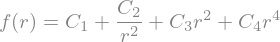

In [17]:
# y procedemos a resolver la ecuación diferencial
sol_ec_dif = dsolve(ec_dif, f)

# e imprimimos la solución
sol_ec_dif

Se reescriben las constantes de modo que aparezcan igual que en el libro:

In [18]:
A, B, C, D     = symbols('A, B, C, D')
C1, C2, C3, C4 = symbols('C1, C2, C3, C4')

f = sol_ec_dif.rhs.subs({C1:D, C2:C, C3:A, C4:B})

imprimir('f(r) = ', f)

<IPython.core.display.Math object>

Se define de nuevo la función de tensión de Airy y se calcula de nuevo su biarmónico:

In [19]:
phi  = f*cos(2*t)

bphi = simplify(lapl(lapl(phi)))

y se verifica que el biarmónico se satisfaga:

In [20]:
if bphi == 0: 
    print("El biarmónico se satisface")
else:
    raise Exception("El biarmónico NO se satisface")

El biarmónico se satisface


Se estiman los esfuerzos con la función de tensión de Airy empleando las ecuaciones:
\begin{align*}
\sigma_r(r,\theta) &= \frac{1}{r}\frac{\partial \phi(r,\theta)}{\partial r} + \frac{1}{r^2}\frac{\partial^2 \phi(r,\theta)}{\partial \theta^2} \\
\sigma_\theta(r,\theta) &= \frac{\partial^2 \phi(r,\theta)}{\partial r^2} \\
\tau_{r\theta}(r,\theta) &= \frac{1}{r^2}\frac{\partial \phi(r,\theta)}{\partial \theta} - \frac{1}{r}\frac{\partial^2 \phi(r,\theta)}{\partial r \partial \theta}
\end{align*}

In [21]:
sr  = factor((1/r)*diff(phi,r) + (1/r**2)*diff(phi,t,2))
st  = factor(diff(phi,r,2))
trt = factor((1/r**2)*diff(phi,t) - (1/r)*diff(phi, r,1, t,1))

In [22]:
imprimir(r'\sigma_r^{**}(r,\theta) = ', sr)

<IPython.core.display.Math object>

In [23]:
imprimir(r'\sigma_\theta^{**}(r,\theta) = ', st)

<IPython.core.display.Math object>

In [24]:
imprimir(r'\tau_{r\theta}^{**}(r,\theta) = ', trt)

<IPython.core.display.Math object>

Si se evalúan dichos esfuerzos para un radio $r = r_e$ y se igualan con la condición de esfuerzos
\begin{align}
  \sigma_r^{**}(r_e,\theta) &= \frac{S_x\cos 2\theta}{2} & \sigma_\theta^{**}(r_e,\theta) &= -\frac{S_x\cos 2\theta}{2} & \tau_{r\theta}^{**}(r_e,\theta) &= -\frac{S_x\sin 2\theta}{2},
\end{align}
aparece un sistema de cuatro ecuaciones con las cuatro incógnitas $A$, $B$, $C$, y $D$; el valor de dichas constantes se puede determinar así:

In [25]:
# condición de esfuerzos en el infinito (re -> oo):
sr_ast2_re  =  Sx*cos(2*t)/2
st_ast2_re  = -Sx*cos(2*t)/2
trt_ast2_re = -Sx*sin(2*t)/2

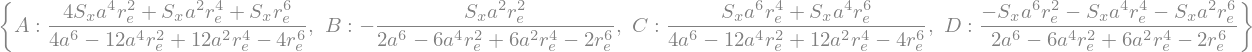

In [26]:
# se plantea y resuelve el sistema de 4 ecuaciones con 4 incógnitas
ABCD = solve([
            Eq(sr.subs (r,a) , 0          ),
            Eq(sr.subs (r,re), sr_ast2_re ),
            Eq(trt.subs(r,a) , 0          ),
            Eq(trt.subs(r,re), trt_ast2_re)
    ], [A, B, C, D])

ABCD

y se toma el límite cuando el radio exterior $r_e$ tiende a infinito:

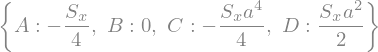

In [27]:
for var in ABCD:
    ABCD[var] = limit(ABCD[var], re, oo)
    
# Nota: las dos líneas anteriores se pueden escribir de forma compacta como:
# sol = { var : limit(ABCD[var], re, oo) for var in ABCD }

ABCD

al reemplazar estas constantes en las ecuaciones asociadas a $\sigma_r^{**}(r_e,\theta)$, $\sigma_\theta^{**}(r_e,\theta)$ y $\tau_{r\theta}^{**}(r_e,\theta)$, resulta:

In [28]:
sr_ast2  = simplify( sr.subs(ABCD))
st_ast2  = simplify( st.subs(ABCD))
trt_ast2 = simplify(trt.subs(ABCD))

In [29]:
imprimir(r'\sigma_r^{**}(r,\theta) = ', sr_ast2)

<IPython.core.display.Math object>

In [30]:
imprimir(r'\sigma_\theta^{**}(r,\theta) = ', st_ast2)

<IPython.core.display.Math object>

In [31]:
imprimir(r'\tau_{r\theta}^{**}(r,\theta) = ', trt_ast2)

<IPython.core.display.Math object>

## Estimación de los esfuerzos asociados a $\sigma_r(r_e,\theta)$, $\sigma_\theta(r_e,\theta)$ y $\tau_{r\theta}(r_e,\theta)$

Finalmente, por virtud del principio de superposición podemos sumar ambas respuestas $*$ y $**$, para obtener las llamadas **ecuaciones de Kirsch**:

In [32]:
sr  = simplify( sr_ast1 +  sr_ast2)
st  = simplify( st_ast1 +  st_ast2)
trt = simplify(trt_ast1 + trt_ast2)

In [33]:
imprimir(r'\sigma_r(r,\theta) = ', sr)

<IPython.core.display.Math object>

In [34]:
imprimir(r'\sigma_\theta(r,\theta) = ', st)

<IPython.core.display.Math object>

In [35]:
imprimir(r'\tau_{r\theta}(r,\theta) = ', trt)

<IPython.core.display.Math object>

Note que estos esfuerzos normales $\sigma_r$ y $\sigma_{\theta}$ son simétricos con respecto a los ejes $x$ y $y$; esto se debe al hecho de que $\cos(2\theta)=\cos(-2 \theta)$; por otro lado, los esfuerzos cortantes $\tau_{r\theta}$ son antisimétricos con respecto al origen de coordenadas, ya que $\sin(2\theta)=-\sin(-2\theta)$. 

## Calculo de $\sigma_r(r_e,\theta)$, $\sigma_\theta(r_e,\theta)$ y $\tau_{r\theta}(r_e,\theta)$ para un estado de esfuerzos $\sigma_x = S_x$, $\sigma_y = S_y$ y $\tau_{xy} = T_{xy}$

A continuación, deduciremos las ecuaciones para una placa sometida a un estado de esfuerzos $\sigma_x = S_x$, $\sigma_y = S_y$ y $\tau_{xy} = T_{xy}$, tal y como se muestra:

<img src="Kirsch2.png" width="800">

para tal fin, se utilizará el principio de superposición.

### Caso a: estado de esfuerzos $\sigma_x = S_x$, $\sigma_y = 0$ y $\tau_{xy} = 0$

In [36]:
# Caso a: estado de esfuerzos sigma_x=Sx
sr_Sx  = sr
st_Sx  = st
trt_Sx = trt

### Caso b: estado de esfuerzos $\sigma_x = 0$, $\sigma_y = S_y$ y $\tau_{xy} = 0$

Para encontrar las ecuaciones del caso (b), basta con rotar la placa 90 grados en sentido horario o antihorario indistintamente. Por lo tanto, girando la placa 90 grados en sentido antihorario y utilizando el siguiente código:

In [37]:
# Caso b: estado de esfuerzos sigma_y=Sy, giro 90 grados sentido antihorario
sr_Sy  =  sr.subs({Sx:Sy, t:t-pi/2})
st_Sy  =  st.subs({Sx:Sy, t:t-pi/2})
trt_Sy = trt.subs({Sx:Sy, t:t-pi/2})

(¿por qué se escribió como ángulo $\theta - 90^\circ$ y no $\theta + 90^\circ$?)

encontramos que:

In [38]:
imprimir(r'\sigma_r(r,\theta) = ', sr_Sy)

<IPython.core.display.Math object>

In [39]:
imprimir(r'\sigma_\theta(r,\theta) = ', st_Sy)

<IPython.core.display.Math object>

In [40]:
imprimir(r'\tau_{r\theta}(r,\theta) = ', trt_Sy)

<IPython.core.display.Math object>

### Caso c: estado de esfuerzos $\sigma_x = 0$, $\sigma_y = 0$ y $\tau_{xy} = T_{xy}$

Para obtener las ecuaciones asociadas al caso (c), el cual es cortante puro, recordemos que el estado de cortante puro se puede lograr utilizando dos estados de esfuerzo normales, uno a tracción y otro a compresión:

<img src="Kirsch3.png" width="800">

para tal fin, se deben rotar $45^\circ$ en sentido horario las anteriores; así, utilizando el siguiente código:

In [41]:
# Caso c: estado de esfuerzos tau_y = Txy, el estado es la suma de los esfuerzos a 45 y a 135 grados
sr_45   =  sr.subs({Sx:+Txy, t:t-pi/4})
st_45   =  st.subs({Sx:+Txy, t:t-pi/4})
trt_45  = trt.subs({Sx:+Txy, t:t-pi/4})

sr_135  =  sr.subs({Sx:-Txy, t:t-3*pi/4})
st_135  =  st.subs({Sx:-Txy, t:t-3*pi/4})
trt_135 = trt.subs({Sx:-Txy, t:t-3*pi/4})

sr_Txy  = expand( sr_45 +  sr_135)
st_Txy  = expand( st_45 +  st_135)
trt_Txy = expand(trt_45 + trt_135)

In [42]:
imprimir(r'\sigma_r(r,\theta) = ', sr_Txy)

<IPython.core.display.Math object>

In [43]:
imprimir(r'\sigma_\theta(r,\theta) = ', st_Txy)

<IPython.core.display.Math object>

In [44]:
imprimir(r'\tau_{r\theta}(r,\theta) = ', trt_Txy)

<IPython.core.display.Math object>

### Se aplica el principio de superposición

Finalmente, por virtud del principio de superposición, al sumar las ecuaciones anteriores resulta:    

In [45]:
# Se suman los esfuerzos para los casos a, b y c
sr_comp  = simplify( sr_Sx +  sr_Sy +  sr_Txy).collect([sin(2*t), cos(2*t)])
st_comp  = simplify( st_Sx +  st_Sy +  st_Txy).collect([sin(2*t), cos(2*t)])
trt_comp = simplify(trt_Sx + trt_Sy + trt_Txy).collect([sin(2*t), cos(2*t)])

In [46]:
imprimir(r'\sigma_r(r,\theta) = ', sr_comp)

<IPython.core.display.Math object>

In [47]:
imprimir(r'\sigma_\theta(r,\theta) = ', st_comp)

<IPython.core.display.Math object>

In [48]:
imprimir(r'\tau_{r\theta}(r,\theta) = ', trt_comp)

<IPython.core.display.Math object>

### Se calculan los esfuerzos de aro (para el anillo interior), haciendo $r=a$

In [49]:
imprimir(r'\sigma_r(a,\theta) = ', simplify(sr_comp.subs(r,a)))

<IPython.core.display.Math object>

In [50]:
st_ra =  simplify(st_comp.subs(r,a))
imprimir(r'\sigma_\theta(a,\theta) = ', st_ra)

<IPython.core.display.Math object>

In [51]:
imprimir(r'\tau_{r\theta}(a,\theta) = ', simplify(trt_comp.subs(r,a)))

<IPython.core.display.Math object>

### Se calculan los esfuerzos para $\theta = 90^\circ$

In [52]:
sr_t90 = simplify(sr_comp.subs(t,pi/2))
imprimir(r'\sigma_r(r,90^\circ) = ', sr_t90)

<IPython.core.display.Math object>

In [53]:
st_t90 =  simplify(st_comp.subs(t,pi/2))
imprimir(r'\sigma_\theta(r,90^\circ) = ', st_t90)

<IPython.core.display.Math object>

In [54]:
trt_t90 = simplify(trt_comp.subs(t,pi/2))
imprimir(r'\tau_{r\theta}(r,90^\circ) = ', trt_t90)

<IPython.core.display.Math object>

## Se dibujan los esfuerzos

In [55]:
# se pasan los esfuerzos de sympy a numpy
esf_sr  = lambdify([Sx, Sy, Txy, a, r, t],  sr_comp)
esf_st  = lambdify([Sx, Sy, Txy, a, r, t],  st_comp)
esf_trt = lambdify([Sx, Sy, Txy, a, r, t], trt_comp)

# esfuerzos para r=a
esf_st_ra  = lambdify([Sx, Sy, Txy, t], st_ra)

# esfuerzos para t=90°
esf_sr_t90  = lambdify([Sx, Sy, Txy, a, r],  sr_t90)
esf_st_t90  = lambdify([Sx, Sy, Txy, a, r],  st_t90)
esf_trt_t90 = lambdify([Sx, Sy, Txy, a, r], trt_t90)

In [56]:
import numpy as np

# se definen las variables asociadas a la geometría y la posición
Sx  = 1 # esfuerzo Sx unitario
Sy  = 0
Txy = 0
a   = 1 # radio a unitario

theta = np.linspace(0, 2*np.pi, 361)   # el ángulo theta varía entre 0 y 2*pi
rr_aa = np.linspace(1, 7.5, 100)       # distancia normalizada r/a

[r_a,t] = np.meshgrid(rr_aa,theta)     # puntos donde se hará el cálculo
x       = r_a*np.cos(t)                # de coordenadas polares a cartesianas
y       = r_a*np.sin(t)

# se calculan los esfuerzos sr, st y trt
sr  = esf_sr (Sx, Sy, Txy, a, r_a*a, t)
st  = esf_st (Sx, Sy, Txy, a, r_a*a, t)
trt = esf_trt(Sx, Sy, Txy, a, r_a*a, t)

# los esfuerzos se convierten de coordenadas polares a rectangulares
sx  = sr*np.cos(t)**2 + st*np.sin(t)**2 - trt*np.sin(2*t)
sy  = sr*np.sin(t)**2 + st*np.cos(t)**2 + trt*np.sin(2*t)
txy = (sr - st)*np.sin(2*t)/2 + trt*np.cos(2*t)

# se calcula el esfuerzo cortante máximo
tmax = np.hypot((sx - sy)/2, txy)

In [57]:
import matplotlib.pyplot as plt

# función para graficar los esfuerzos
def dibujar_esf(titulo, x, y, var):
    # se verifica que los tamaños de los arrays coincidan
    assert x.shape == y.shape == var.shape, "x, y y var deben tener el mismo tamaño" 
    
    # se promedian las cuatro esquinas para formar el valor de la celda
    celda = (var[:-1,:-1] + var[1:,:-1] + var[:-1,1:] + var[1:,1:])/4
    
    fig, ax = plt.subplots()
    co = ax.pcolormesh(x, y, celda, cmap='jet')      # se hace el gráfico de colores
    cl = ax.contour(x, y, var, 20, linewidths=0.5, linestyles='dashed')
    ax.clabel(cl, inline=True, fontsize=6)
    fig.colorbar(co, ax=ax)                          # colocar una barra de color
    ax.set_xlabel('Eje $x$ normalizado ($r/a$)')     # título del eje X
    ax.set_ylabel('Eje $y$ normalizado ($r/a$)')     # título del eje Y
    ax.set_title('Esfuerzos normalizados ' + titulo) # titulo del gráfico
    ax.axis('equal')                                 # ejes iguales
    ax.axis([-5, 5, -5, 5])                          # [xmin, xmax, ymin, ymax]

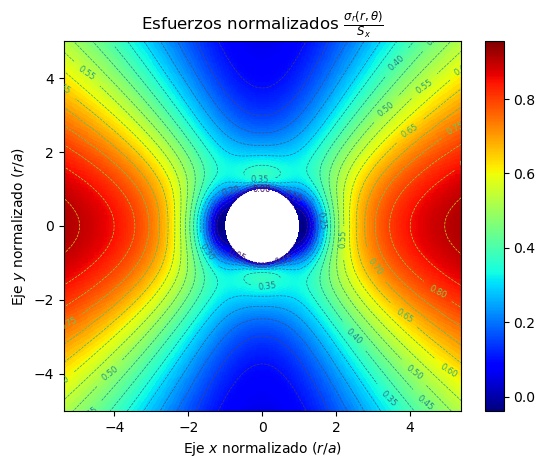

In [58]:
dibujar_esf(r'$\frac{\sigma_r(r,\theta)}{S_x}$', x, y, sr)

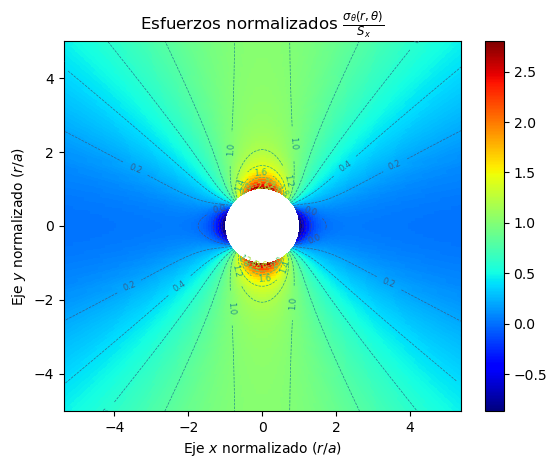

In [59]:
dibujar_esf(r'$\frac{\sigma_\theta(r,\theta)}{S_x}$', x, y, st) 

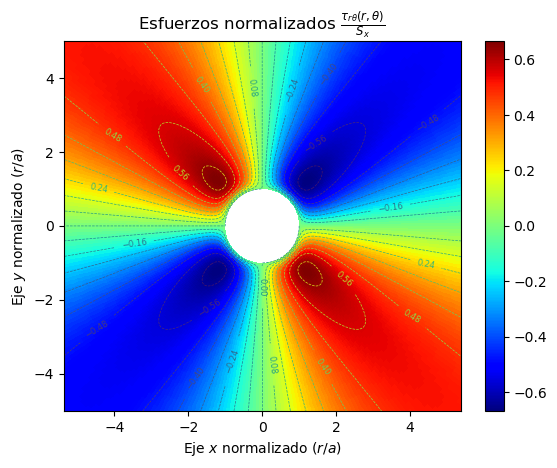

In [60]:
dibujar_esf(r'$\frac{\tau_{r\theta}(r,\theta)}{S_x}$', x, y, trt)

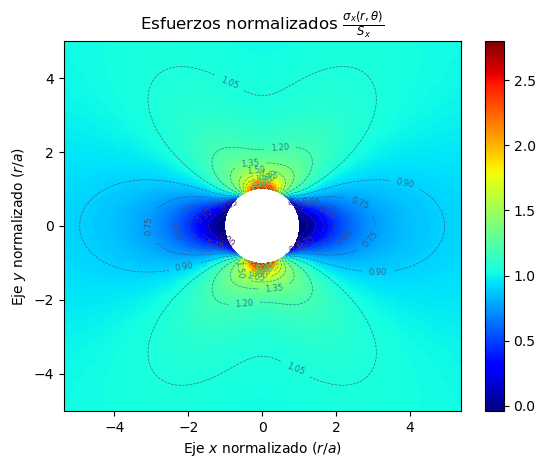

In [61]:
dibujar_esf(r'$\frac{\sigma_x(r,\theta)}{S_x}$', x, y, sx)

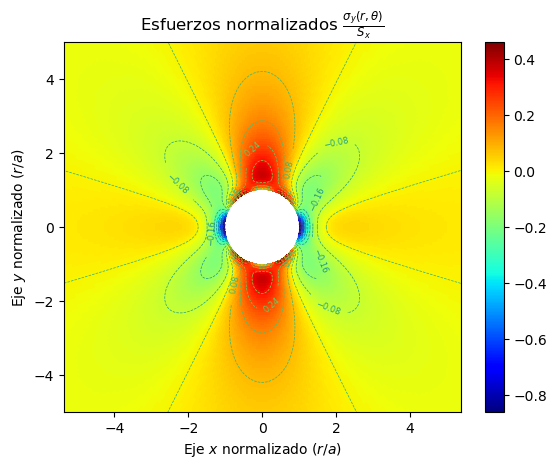

In [62]:
dibujar_esf(r'$\frac{\sigma_y(r,\theta)}{S_x}$', x, y, sy)

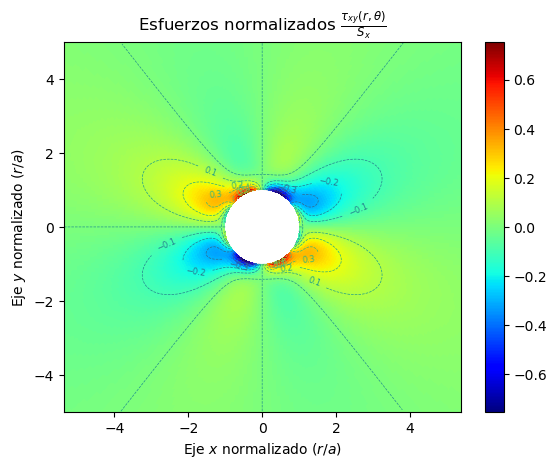

In [63]:
dibujar_esf(r'$\frac{\tau_{xy}(r,\theta)}{S_x}$', x, y, txy)

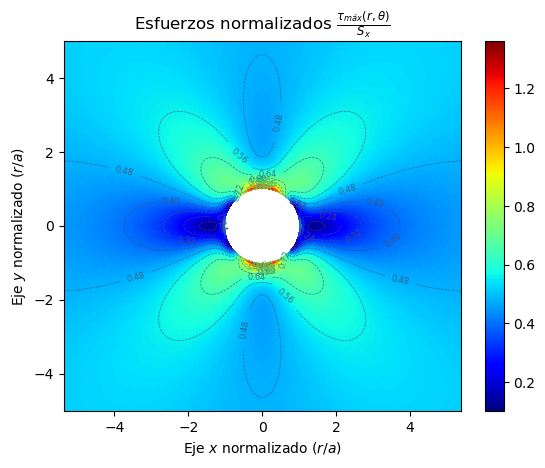

In [64]:
dibujar_esf(r'$\frac{\tau_{máx}(r,\theta)}{S_x}$', x, y, tmax)

Comparemos la figura anterior con la fotografía del método fotoelástico (nota aquí se está aplicando un $S_y$ no un $S_x$). Observe que las curvas de nivel son similares:

<img src="https://www.engineeringafuture.com/wp-content/uploads/2015/08/Stress-Concentrations-around-a-Hole.png" width="800">

## Se grafican los esfuerzos del anillo interior (para $r=a$)

En representación polar:

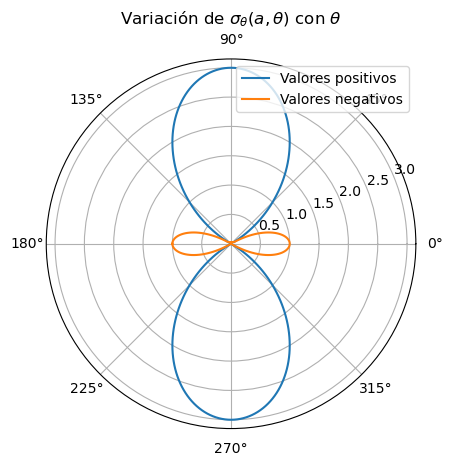

In [65]:
st_ra = esf_st_ra(Sx, Sy, Txy, theta)
plt.polar(theta[st_ra>0],     st_ra[st_ra>0], label='Valores positivos')
plt.polar(theta[st_ra<0]+pi, -st_ra[st_ra<0], label='Valores negativos')
plt.title(r'Variación de $\sigma_\theta(a,\theta)$ con $\theta$')
plt.legend()
plt.show()

En el plano cartesiano:

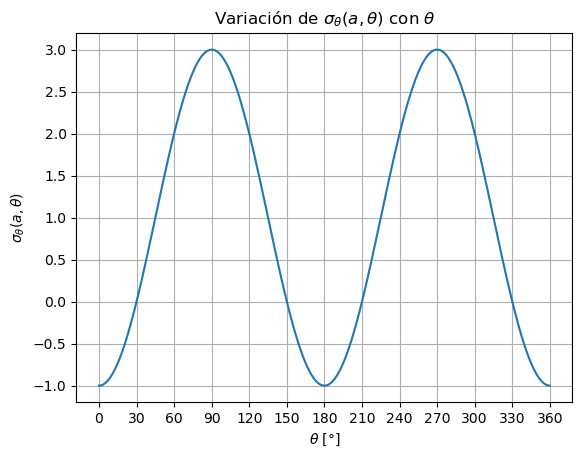

In [66]:
plt.plot(np.rad2deg(theta), st_ra)
plt.xticks(np.arange(0, 361, step=30))
plt.title(r'Variación de $\sigma_\theta(a,\theta)$ con $\theta$')
plt.xlabel(r'$\theta$ [°]')
plt.ylabel(r'$\sigma_\theta(a,\theta)$')
plt.grid('on')  # se coloca una grilla
plt.show()

### Se grafica la variación de los esfuerzos para $\theta = 90^\circ$

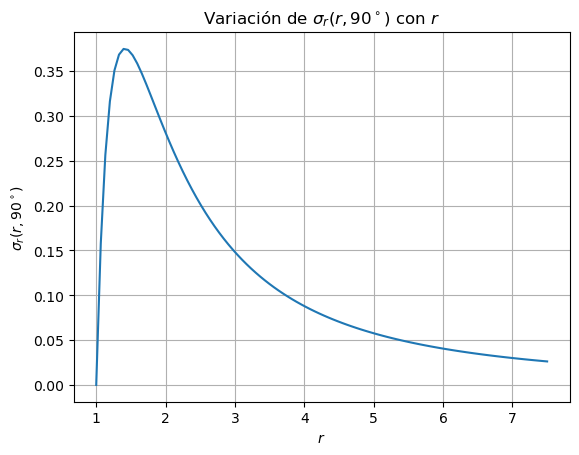

In [67]:
r = rr_aa*a
sr_t90  = esf_sr_t90(Sx, Sy, Txy, a, r)
plt.plot(r, sr_t90)
plt.title(r'Variación de $\sigma_r(r,90^\circ)$ con $r$')
plt.xlabel('$r$')
plt.ylabel(r'$\sigma_r(r,90^\circ)$')
plt.grid('on')  # se coloca una grilla
plt.show()

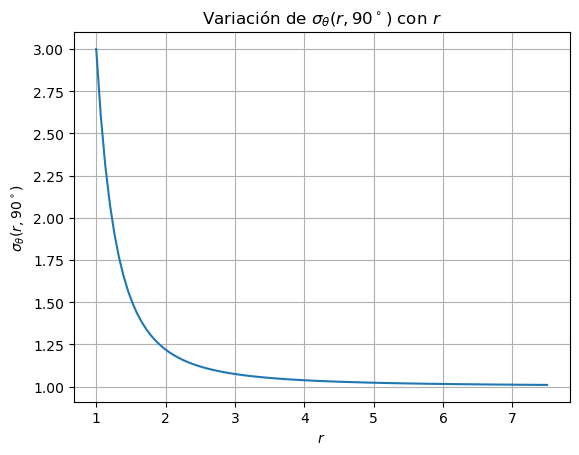

In [68]:
st_t90  = esf_st_t90(Sx, Sy, Txy, a, r)
plt.plot(r, st_t90)
plt.title(r'Variación de $\sigma_\theta(r,90^\circ)$ con $r$')
plt.xlabel('$r$')
plt.ylabel(r'$\sigma_\theta(r,90^\circ)$')
plt.grid('on')  # se coloca una grilla
plt.show()

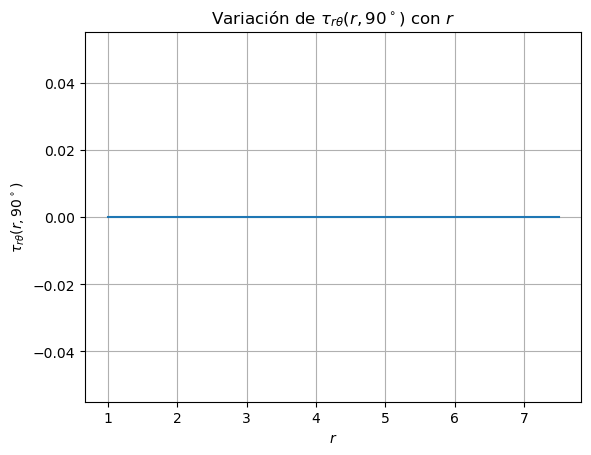

In [69]:
trt_t90 = esf_trt_t90(Sx, Sy, Txy, a, r)
plt.plot(r, trt_t90)
plt.title(r'Variación de $\tau_{r\theta}(r,90^\circ)$ con $r$')
plt.xlabel('$r$')
plt.ylabel(r'$\tau_{r\theta}(r,90^\circ)$')
plt.grid('on')  # se coloca una grilla
plt.show()